In [1]:
pip install highlight_text

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
import numpy as np
from highlight_text import fig_text
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import json

In [3]:
pip install highlight-text

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Entering the league's  link
link = "https://understat.com/league/EPL/2023"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the table 
strings = scripts[3].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

# Creating a dataframe
df = pd.DataFrame(data)

# Filtering the data 
df = df[['player_name','team_title','goals','assists','xG','xA']]
df = df.astype({"xG": float, "goals": int, "assists": int, "xA": float, "team_title": str,'player_name':str})

In [5]:
# Getting the 2 best goalscorers 
df = df.set_index('player_name').groupby('team_title')['goals'].nlargest(2).reset_index()

In [6]:
df.head(5)

,team_title,player_name,goals
0,Arsenal,Bukayo Saka,16
1,Arsenal,Kai Havertz,13
2,Aston Villa,Ollie Watkins,19
3,Aston Villa,Leon Bailey,10
4,"Aston Villa,Sheffield United",Cameron Archer,4


In [7]:
# Eliminating player duplicates
df = df[~df.team_title.str.contains(",")]

In [8]:
df

,team_title,player_name,goals
0,Arsenal,Bukayo Saka,16
1,Arsenal,Kai Havertz,13
2,Aston Villa,Ollie Watkins,19
3,Aston Villa,Leon Bailey,10
5,Bournemouth,Dominic Solanke,19
6,Bournemouth,Antoine Semenyo,8
7,Brentford,Yoane Wissa,12
8,Brentford,Bryan Mbeumo,9
11,Brighton,João Pedro,9
12,Brighton,Evan Ferguson,6


In [9]:
# sorting the dataframe 
df = df.sort_values(['goals','team_title'],ascending=False)

In [10]:
#New column for bool value
df['bool'] = df['team_title'].duplicated(keep='first')

# cleaning the title names 
df['team_title'] = df['team_title'].str.replace('Real Madrid','Madrid')
df['team_title'] = df['team_title'].str.replace('Real Sociedad','Sociedad')
df['team_title'] = df['team_title'].str.replace('Real Betis','Betis')

# Creating new columns for shortening team names
df['names'] = df['team_title'].str[0:3]

# Capital letters for team names
df['names'] = df['names'].str.upper()

In [11]:
# Sorting values
df = df.sort_values(['names'],ascending=True)
# Dividing the DataFrames in highest goalscorer and second highest goalscorer
df_min = df[df['bool']==True] # Highest
df_max = df[df['bool']==False] # Second Highest

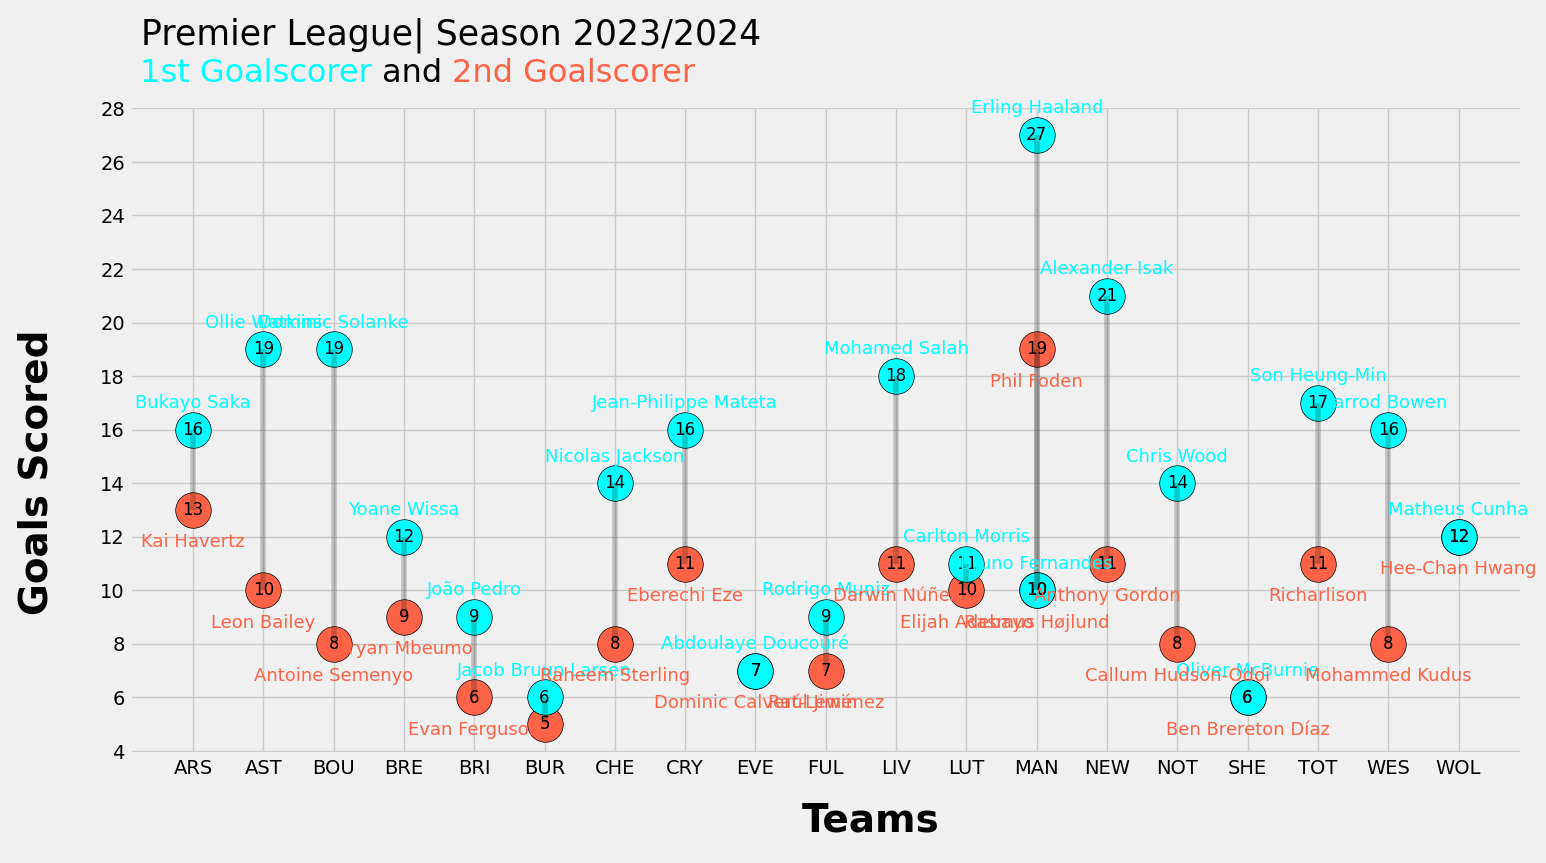

In [14]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (16,8))

# plotting
ax.scatter(df_min['names'],df_min['goals'], color='tomato', edgecolor='black',s=655, label="Second Best Scorer")
ax.scatter(df_max['names'],df_max['goals'], color='cyan', edgecolor='black',s=655, label="First Best Scorer")

# title
fig_text(0.08,0.94, s=" <1st Goalscorer> and <2nd Goalscorer>",highlight_textprops=[{"color":'cyan'}, {'color':"tomato"}], fontsize = 23, fontweight="light", color = "black")
fig_text(0.08,0.99, s=" Premier League| Season 2023/2024 ", fontsize = 25, fontweight="light")

# text
fig_text(0.5,0.01, s="Teams\n", fontsize = 28, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="Goals Scored\n", fontsize = 28, fontweight = "bold", color = "black",rotation=90)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])


# Horizontal lines
plt.vlines( ymin=df_min['goals'], ymax=df_max['goals'],x=df_max['names'], color='black', alpha=0.2,linestyle="solid")

# Annotate text goals
for i in range(len(df_min['goals'].tolist())):
    plt.annotate(df_min['goals'].tolist()[i], (df_min['names'].tolist()[i],df_min['goals'].tolist()[i]),c='black',size=12,ha='center',va='center')
for i in range(len(df_max['goals'].tolist())):
    plt.annotate(df_max['goals'].tolist()[i], (df_max['names'].tolist()[i],df_max['goals'].tolist()[i]),c='black',size=12,ha='center',va='center')    

# Annotate text player names
for i in range(len(df_max['goals'].tolist())):
    plt.annotate(df_max['player_name'].tolist()[i], (df_max['names'].tolist()[i],df_max['goals'].tolist()[i]+1),c='cyan',size=13,ha='center',va='center')  
for i in range(len(df_min['goals'].tolist())):
    plt.annotate(df_min['player_name'].tolist()[i], (df_min['names'].tolist()[i],df_min['goals'].tolist()[i]-1.2),c='tomato',size=13,ha='center',va='center')

/var/folders/_p/wf6330xj30q7xlwcspkwhlsw0000gn/T/ipykernel_6390/2306576886.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [1000]
/var/folders/_p/wf6330xj30q7xlwcspkwhlsw0000gn/T/ipykernel_6390/2306576886.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [1000]


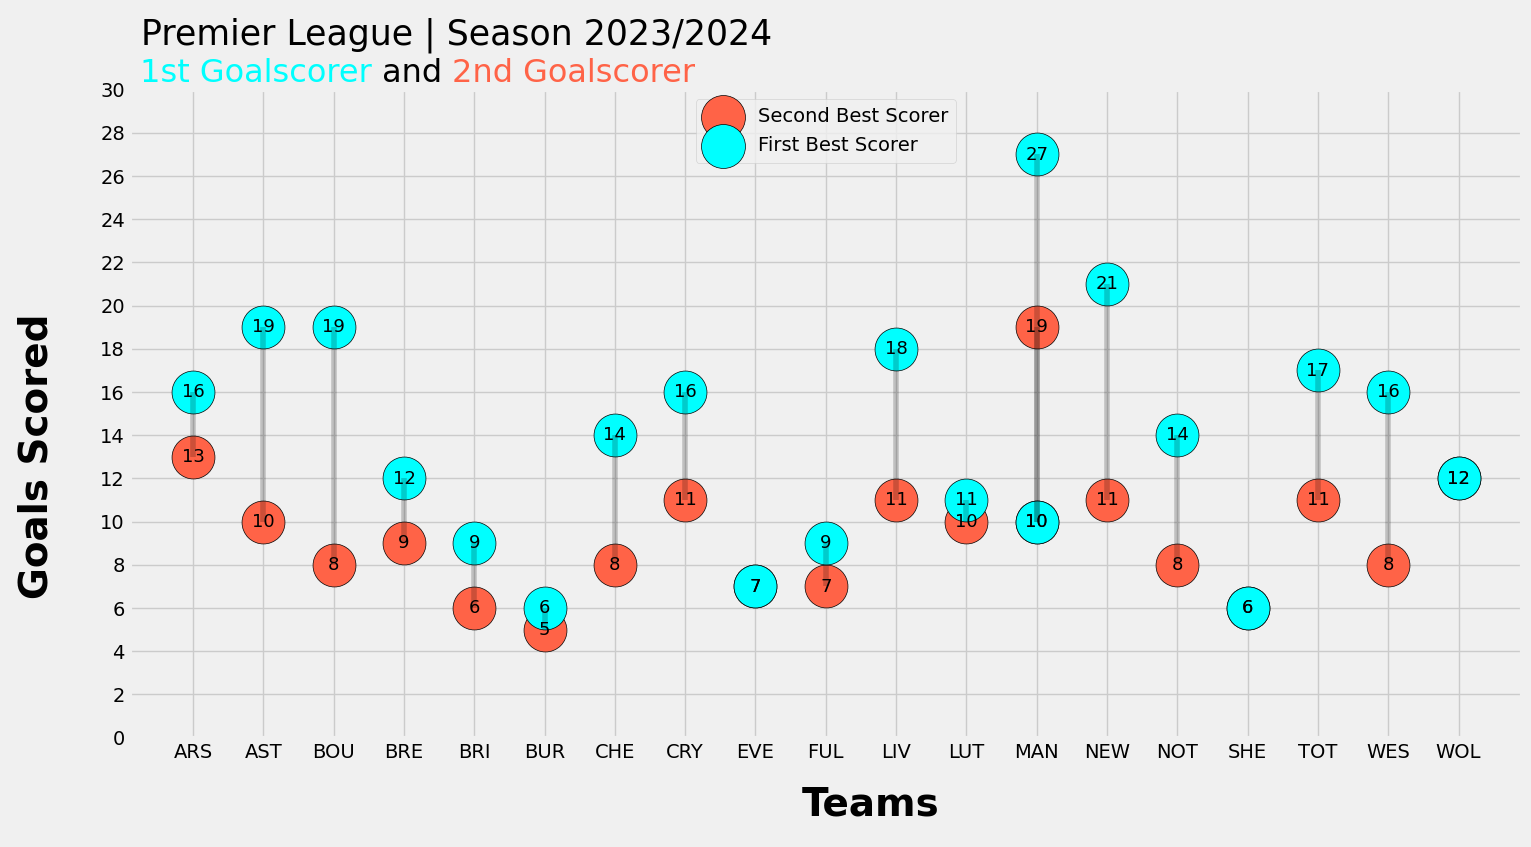

In [16]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (16,8))

# plotting
ax.scatter(df_min['names'],df_min['goals'], color='tomato', edgecolor='black',s=955, label="Second Best Scorer")
ax.scatter(df_max['names'],df_max['goals'], color='cyan', edgecolor='black',s=955, label="First Best Scorer")

# Horizontal lines
plt.vlines( ymin=df_min['goals'], ymax=df_max['goals'],x=df_max['names'], color='black', alpha=0.2,linestyle="solid")

# title
fig_text(0.08,0.92, s=" <1st Goalscorer> and <2nd Goalscorer>",highlight_textprops=[{"color":'cyan'}, {'color':"tomato"}], fontsize = 23, fontweight="light", color = "black")
fig_text(0.08,0.97, s=" Premier League | Season 2023/2024", fontsize = 25, fontweight="light")

# text
fig_text(0.5,0.01, s="Teams\n", fontsize = 28, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="Goals Scored\n", fontsize = 28, fontweight = "bold", color = "black",rotation=90)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])

# Annotate text goals
for i in range(len(df_min['goals'].tolist())):
    plt.annotate(df_min['goals'].tolist()[i], (df_min['names'].tolist()[i],df_min['goals'].tolist()[i]),c='black',size=13,ha='center',va='center')
for i in range(len(df_max['goals'].tolist())):
    plt.annotate(df_max['goals'].tolist()[i], (df_max['names'].tolist()[i],df_max['goals'].tolist()[i]),c='black',size=13,ha='center',va='center')    

    # legend
legend = ax.legend(loc="upper center")
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]